# 1D CNN Bike Demand Forecast Time series -- Deep Learning 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
df=pd.read_csv('/content/drive/My Drive/Bike-demand/master_final.csv')


df['bikes']=df['bikes'].astype('float16')


df['pressure']=df['pressure'].astype('float16')
df['temperature']=df['temperature'].astype('float16')
df['wind']=df['wind'].astype('float16')
df['altitude']=df['altitude'].astype('float16')

df['lag_beau_temps']=df['lag_beau_temps'].astype('float16')
df['lag_nuageux']=df['lag_nuageux'].astype('float16')
df['lag_pluvieux']=df['lag_pluvieux'].astype('float16')
df['lag_orage']=df['lag_orage'].astype('float16')
df['lag_30m']=df['lag_30m'].astype('float16')
df['lag_7j']=df['lag_7j'].astype('float16')


df['station']=df['station'].astype('int16')
df['clouds']=df['clouds'].astype('int16')
df['humidity']=df['humidity'].astype('int16')
df['pressure']=df['pressure'].astype('int16')


df['beau_temps']=df['beau_temps'].astype('int8')
df['nuageux']=df['nuageux'].astype('int8')
df['pluvieux']=df['pluvieux'].astype('int8')
df['pluie']=df['pluie'].astype('int8')
df['orage']=df['orage'].astype('int8')


df['hour']=df['hour'].astype('int8')
df['day']=df['day'].astype('int8')
df['month']=df['month'].astype('int8')
df['weekday']=df['weekday'].astype('int16')


df=df.set_index('datetime')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10340547 entries, 2016-04-01 00:00:00 to 2016-10-05 03:30:00
Data columns (total 24 columns):
 #   Column          Dtype  
---  ------          -----  
 0   bikes           float16
 1   station         int16  
 2   clouds          int16  
 3   humidity        int16  
 4   pressure        int16  
 5   temperature     float16
 6   wind            float16
 7   altitude        float16
 8   beau_temps      int8   
 9   nuageux         int8   
 10  pluvieux        int8   
 11  pluie           int8   
 12  orage           int8   
 13  lag_beau_temps  float16
 14  lag_nuageux     float16
 15  lag_pluvieux    float16
 16  lag_pluie       float64
 17  lag_orage       float16
 18  hour            int8   
 19  day             int8   
 20  month           int8   
 21  weekday         int16  
 22  lag_30m         float16
 23  lag_7j          float16
dtypes: float16(10), float64(1), int16(5), int8(8)
memory usage: 532.5+ MB


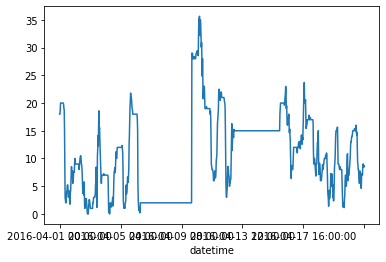

In [ ]:
df['bikes'][:1000].plot()

In [29]:
y = df['bikes']
X= df.drop(['bikes'], axis=1)
train_size=int(len(df) *0.7)
test_size = int(len(df)) - train_size
test_size = test_size+1

print(train_size)
print(test_size)
x_train, y_train = X[:train_size].dropna(), y[:train_size].dropna()
x_val, y_val = X[train_size:].dropna(), y[train_size:].dropna()

7238382
3102166


In [30]:
X_train_series = x_train.values.reshape((x_train.shape[0], x_train.shape[1], 1))
X_valid_series = x_val.values.reshape((x_val.shape[0], x_val.shape[1], 1))
print('Train set shape', X_train_series.shape)
print('Validation set shape', X_valid_series.shape)

Train set shape (7238382, 24, 1)
Validation set shape (3102165, 24, 1)


In [31]:
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten,BatchNormalization, Dropout

model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(loss='mae', optimizer='adam')
model_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 23, 64)            192       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 11, 64)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 704)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                35250     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 35,493
Trainable params: 35,493
Non-trainable params: 0
_________________________________________________________________


In [32]:
cnn_history = model_cnn.fit(X_train_series, y_train, validation_data=(X_valid_series, y_val), epochs=10, verbose=2, shuffle=False, batch_size=100)

Epoch 1/10
72384/72384 - 297s - loss: 1.5202 - val_loss: 1.3237
Epoch 2/10
72384/72384 - 293s - loss: 1.1111 - val_loss: 1.5179
Epoch 3/10
72384/72384 - 291s - loss: 1.0792 - val_loss: 1.1484
Epoch 4/10


KeyboardInterrupt: ignored

In [ ]:
model_cnn.save("/content/drive/My Drive/Bike-demand/my_model-complex-3.h5")
#model_cnn = load_model('/content/drive/My Drive/Bike-demand/my_model.h5')

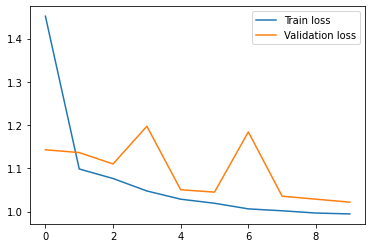

In [ ]:
plt.plot(cnn_history.history['loss'], label='Train loss')
plt.plot(cnn_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')


In [ ]:
pred= model_cnn.predict(X_valid_series)

In [ ]:
val =pd.DataFrame(y_val)
val["pred"]=pred

In [ ]:
val

,bikes,pred
datetime,,
2016-05-10 09:30:00,19.593750,20.320906
2016-05-10 10:00:00,20.328125,19.921297
2016-05-10 10:30:00,19.000000,20.653711
2016-05-10 11:00:00,19.328125,19.338217
2016-05-10 11:30:00,19.671875,19.683079
...,...,...
2016-10-05 01:30:00,3.000000,2.720532
2016-10-05 02:00:00,2.000000,2.719623
2016-10-05 02:30:00,2.000000,1.914253


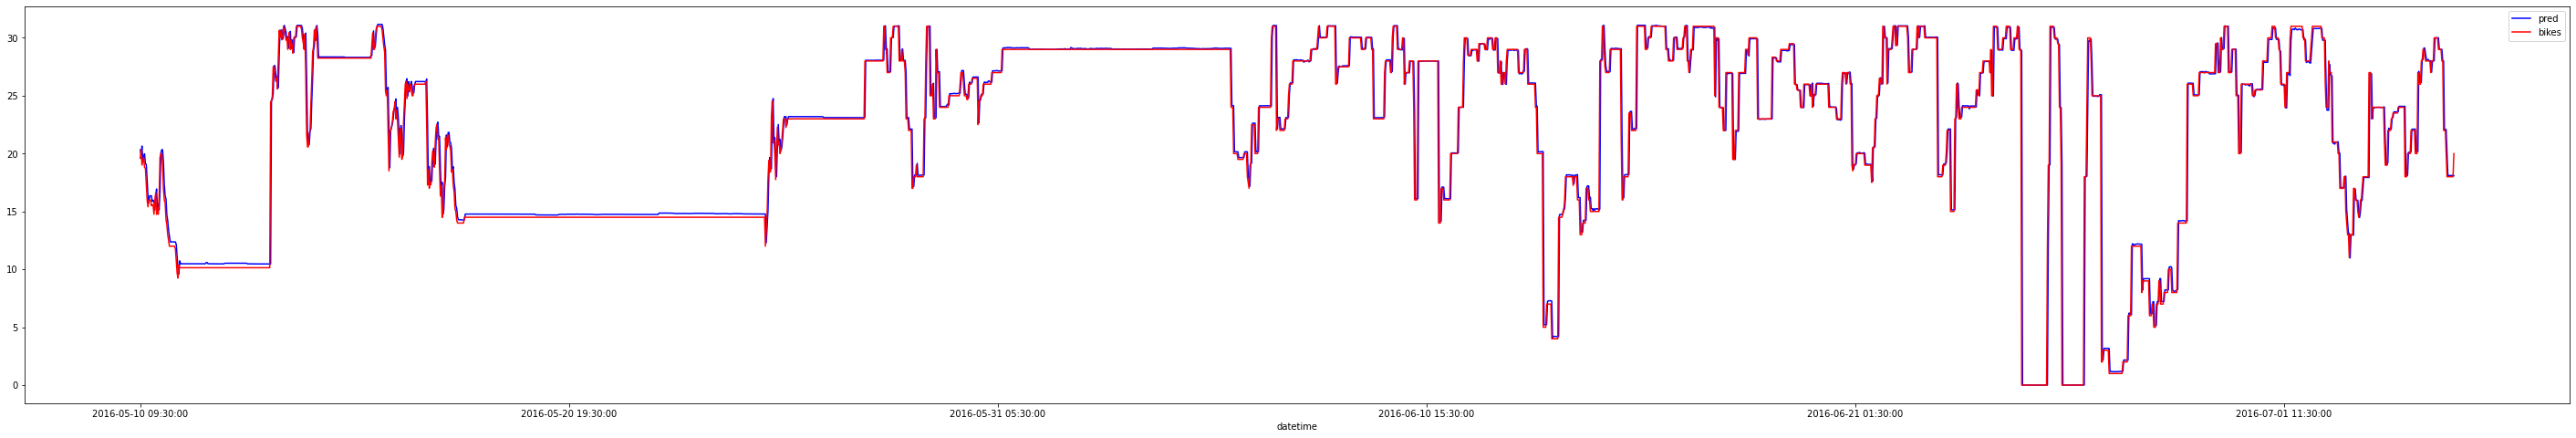

In [ ]:
ax = val['pred'][:2699].plot(figsize=(50,8), legend=True, color='blue')
val['bikes'][:2699].plot(legend=True, color='red', figsize=(50,8))

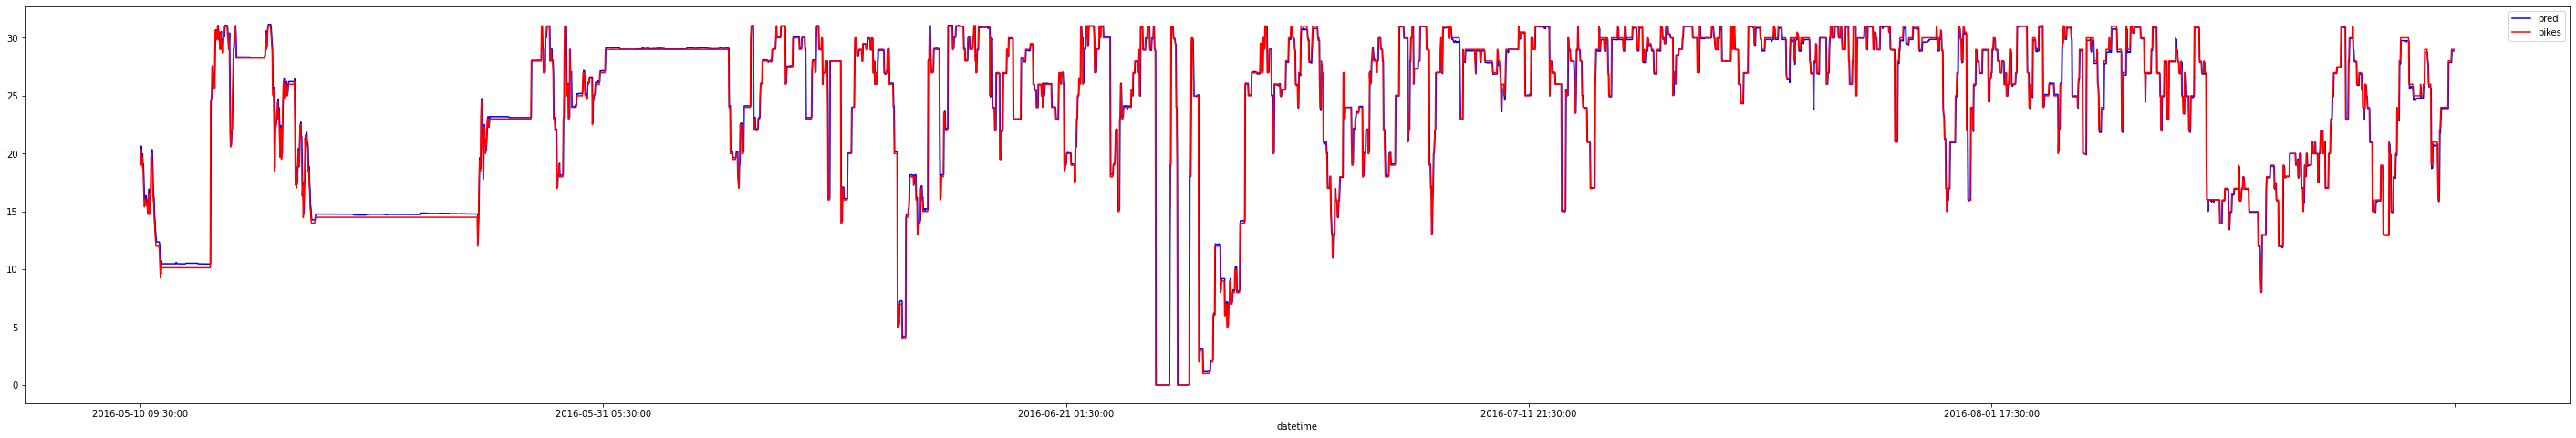

In [ ]:
ax = val['pred'][:5000].plot(figsize=(50,8), legend=True, color='blue')
val['bikes'][:5000].plot(legend=True, color='red', figsize=(50,8))

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(( y_true.mean() - y_pred.mean() ) / y_true.mean() )) * 100
mean_absolute_percentage_error(np.array(val['bikes']) , np.array( val['pred'])) 



0.213493756018579

In [ ]:
from statsmodels.tools.eval_measures import meanabs
error=meanabs(val['pred'], val['bikes'])
error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1.0218878

In [ ]:
MAPE=mean_absolute_percentage_error(np.array(val['bikes'][:5000]) , np.array( val['pred'][:5000]))
print('MAPE error est :',MAPE)

error=meanabs(val['pred'][:5000], val['bikes'][:5000])
print('MAE error est :',error)


MAPE error est : 0.06394873489625752
MAE error est : 0.5269743


complex model

In [9]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_cnn.add(BatchNormalization())
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model_cnn.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Dropout(0.2))
model_cnn.add(Flatten())
model_cnn.add(Dense(1))
model_cnn.compile(loss='mae', optimizer='adam')
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 22, 64)            192       
_________________________________________________________________
batch_normalization (BatchNo (None, 22, 64)            256       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 21, 64)            8256      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 20, 32)            4128      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 320)              

In [ ]:
model_cnn.save("/content/drive/My Drive/Bike-demand/my_model-complex-3.h5")
#model_cnn = load_model('/content/drive/My Drive/Bike-demand/my_model.h5')

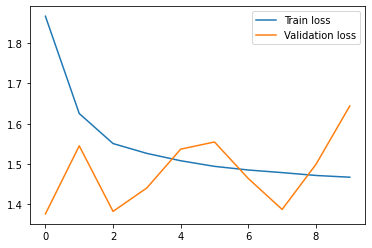

In [ ]:
plt.plot(cnn_history.history['loss'], label='Train loss')
plt.plot(cnn_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')


In [ ]:
pred= model_cnn.predict(X_valid_series)

In [ ]:
val =pd.DataFrame(y_val)
val["pred"]=pred
val

,bikes,pred
datetime,,
2016-05-10 09:30:00,19.593750,19.425886
2016-05-10 10:00:00,20.328125,19.038239
2016-05-10 10:30:00,19.000000,19.796822
2016-05-10 11:00:00,19.328125,18.520180
2016-05-10 11:30:00,19.671875,18.780779
...,...,...
2016-10-05 01:30:00,3.000000,3.619996
2016-10-05 02:00:00,2.000000,3.617540
2016-10-05 02:30:00,2.000000,2.994318


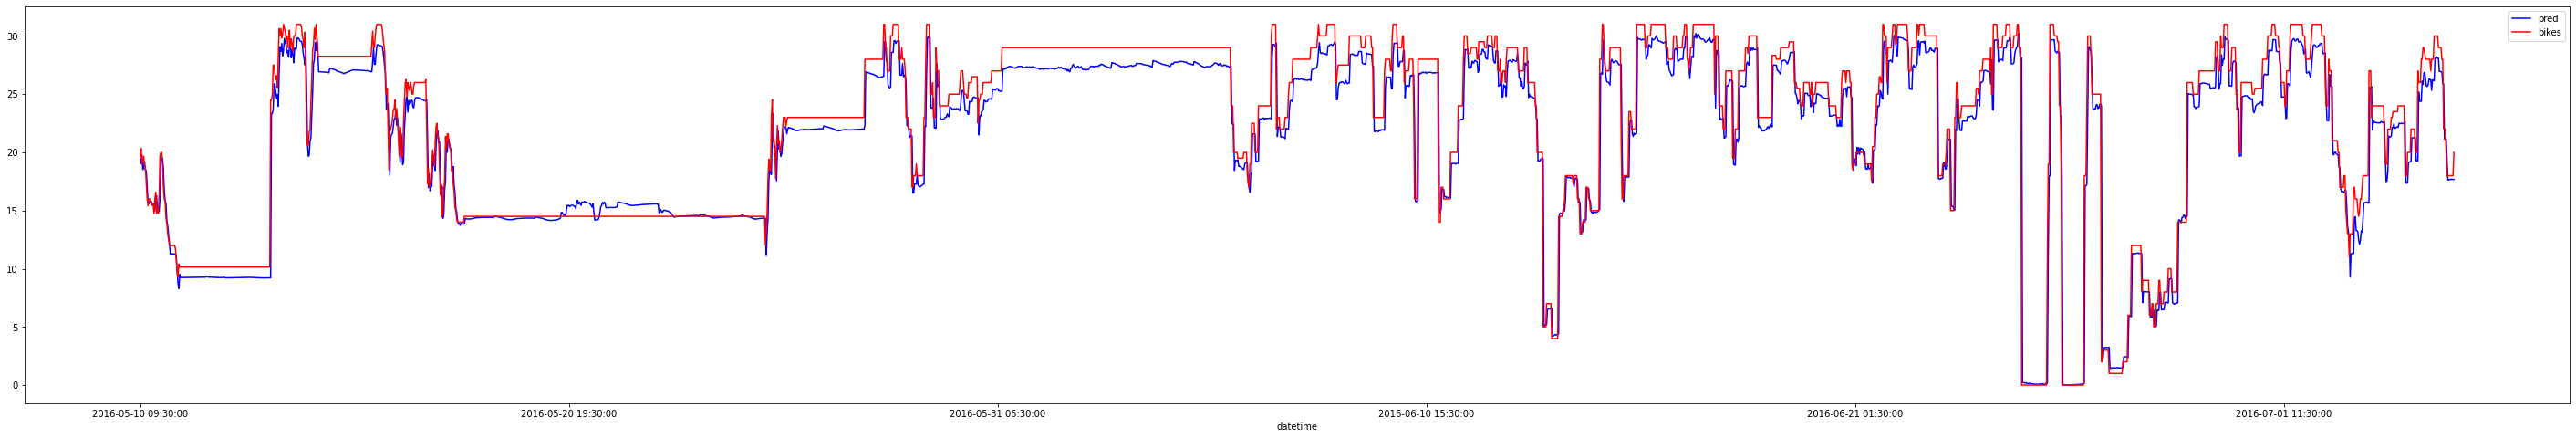

In [ ]:
ax = val['pred'][:2699].plot(figsize=(50,8), legend=True, color='blue')
val['bikes'][:2699].plot(legend=True, color='red', figsize=(50,8))

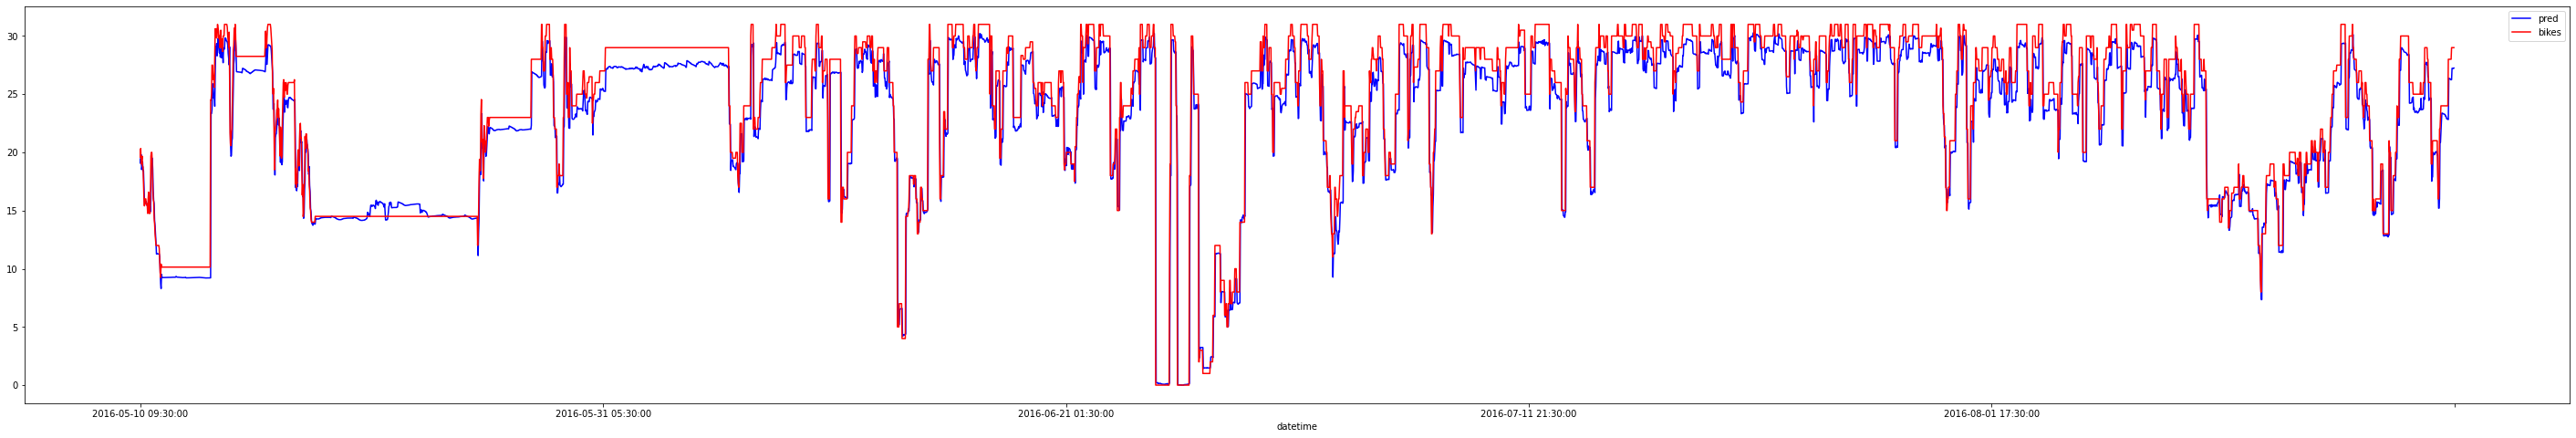

In [ ]:
ax = val['pred'][:5000].plot(figsize=(50,8), legend=True, color='blue')
val['bikes'][:5000].plot(legend=True, color='red', figsize=(50,8))

In [ ]:
mean_absolute_percentage_error(np.array(val['bikes']) , np.array( val['pred'])) 


5.232679471373558

In [ ]:
error=meanabs(val['pred'], val['bikes'])
error

1.6441495

In [ ]:
MAPE=mean_absolute_percentage_error(np.array(val['bikes'][:5000]) , np.array( val['pred'][:5000]))
print('MAPE error est :',MAPE)

error=meanabs(val['pred'][:5000], val['bikes'][:5000])
print('MAE error est :',error)


MAPE error est : 4.388609156012535
MAE error est : 1.3719318


3 emme modele


In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_cnn.add(BatchNormalization())

model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model_cnn.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Dropout(0.2))
model_cnn.add(Flatten())
model_cnn.add(Dense(1))

model_cnn.compile(loss='mae', optimizer='adam')
model_cnn.summary()



Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_21 (Conv1D)           (None, 22, 64)            192       
_________________________________________________________________
batch_normalization_11 (Batc (None, 22, 64)            256       
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 21, 64)            8256      
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 20, 32)            4128      
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 10, 32)            0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 10, 32)            0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 320)             

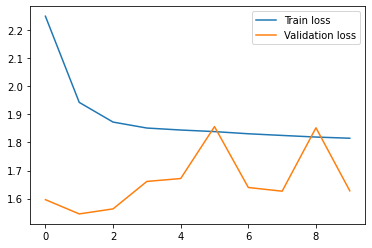

In [ ]:
plt.plot(cnn_history.history['loss'], label='Train loss')
plt.plot(cnn_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')


In [ ]:
pred= model_cnn.predict(X_valid_series)

In [ ]:
val =pd.DataFrame(y_val)
val["pred"]=pred

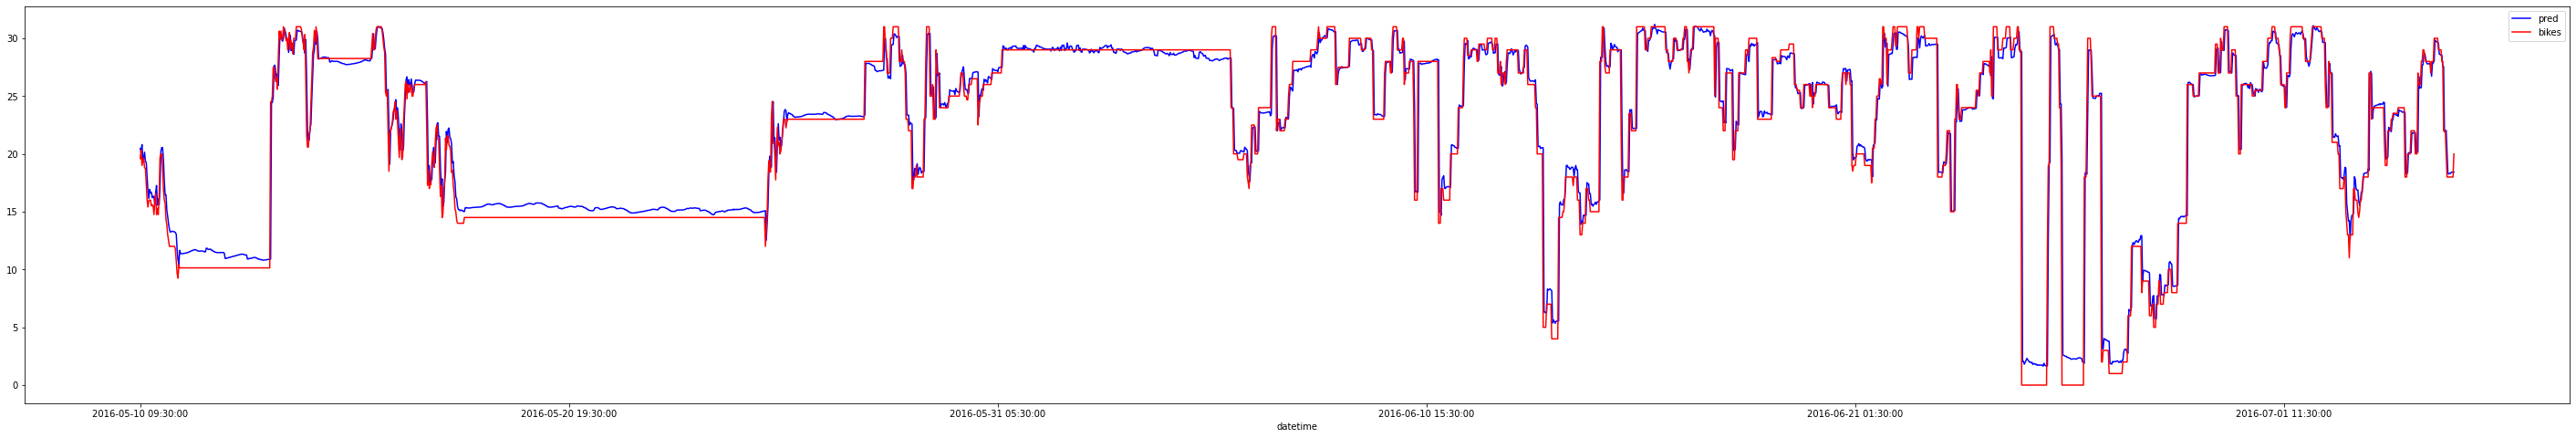

In [ ]:
ax = val['pred'][:2699].plot(figsize=(50,8), legend=True, color='blue')
val['bikes'][:2699].plot(legend=True, color='red', figsize=(50,8))

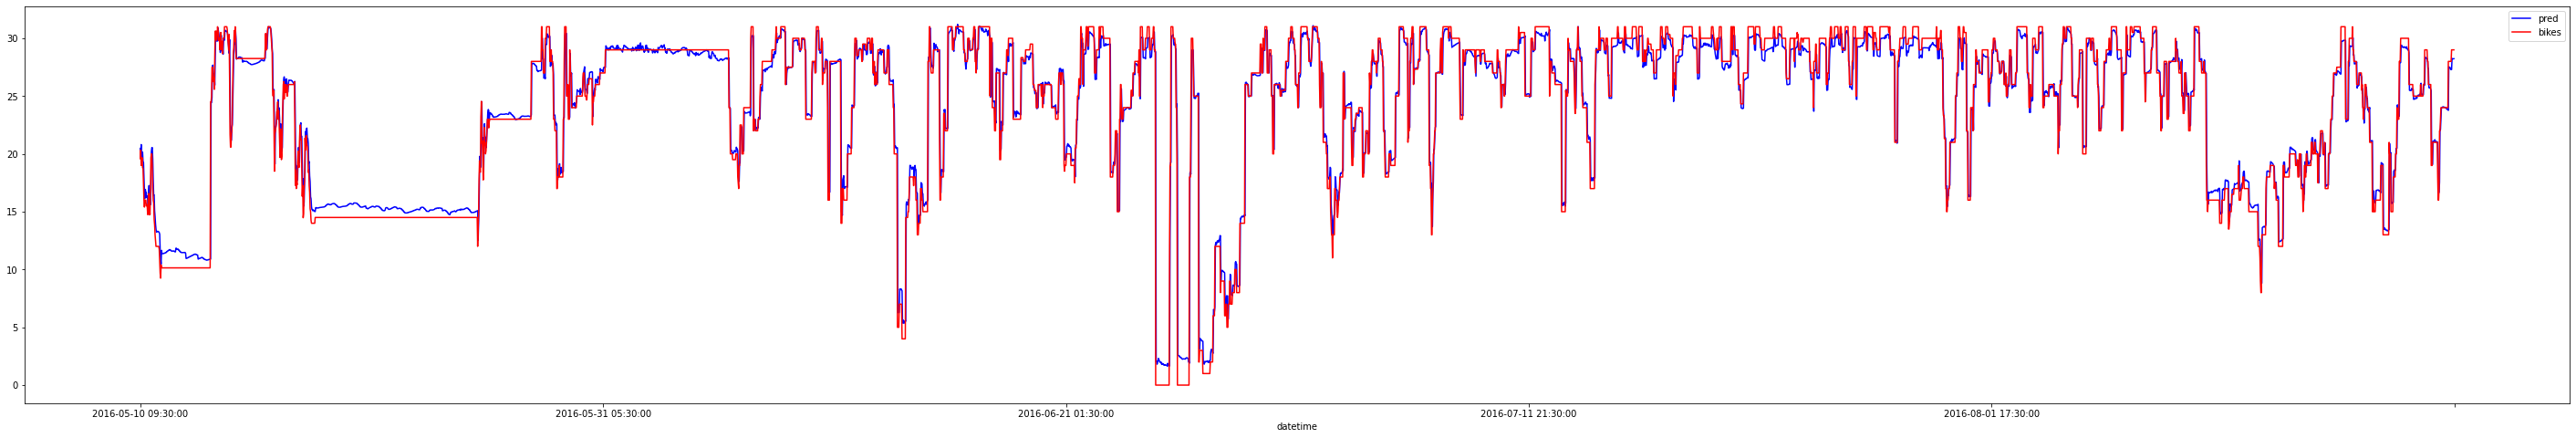

In [ ]:
ax = val['pred'][:5000].plot(figsize=(50,8), legend=True, color='blue')
val['bikes'][:5000].plot(legend=True, color='red', figsize=(50,8))

In [ ]:
mean_absolute_percentage_error(np.array(val['bikes']) , np.array( val['pred'])) 


3.889511153101921

In [ ]:
error=meanabs(val['pred'], val['bikes'])
error

1.62789

In [ ]:
MAPE=mean_absolute_percentage_error(np.array(val['bikes'][:5000]) , np.array( val['pred'][:5000]))
print('MAPE error est :',MAPE)

error=meanabs(val['pred'][:5000], val['bikes'][:5000])
print('MAE error est :',error)

MAPE error est : 0.09873008821159601
MAE error est : 0.82184786


# ADD a lag_1h30 to our model and delate de lag_30m


In [36]:
df = df.drop(['lag_30m'], axis=1 )
df['lag_1h30'] = df['bikes'].shift(3)
df = df.fillna(18)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10340547 entries, 2016-04-01 00:00:00 to 2016-10-05 03:30:00
Data columns (total 24 columns):
 #   Column          Dtype  
---  ------          -----  
 0   bikes           float16
 1   station         int16  
 2   clouds          int16  
 3   humidity        int16  
 4   pressure        int16  
 5   temperature     float16
 6   wind            float16
 7   altitude        float16
 8   beau_temps      int8   
 9   nuageux         int8   
 10  pluvieux        int8   
 11  pluie           int8   
 12  orage           int8   
 13  lag_beau_temps  float16
 14  lag_nuageux     float16
 15  lag_pluvieux    float16
 16  lag_pluie       float64
 17  lag_orage       float16
 18  hour            int8   
 19  day             int8   
 20  month           int8   
 21  weekday         int16  
 22  lag_7j          float16
 23  lag_1h30        float16
dtypes: float16(10), float64(1), int16(5), int8(8)
memory usage: 532.5+ MB


In [37]:
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten,BatchNormalization, Dropout

model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(loss='mae', optimizer='adam')
model_cnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 23, 64)            192       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 11, 64)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 704)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                35250     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 35,493
Trainable params: 35,493
Non-trainable params: 0
_________________________________________________________________


In [38]:
cnn_history = model_cnn.fit(X_train_series, y_train, validation_data=(X_valid_series, y_val), epochs=10, verbose=2, shuffle=False, batch_size=100)

Epoch 1/10
72384/72384 - 287s - loss: 1.6490 - val_loss: 1.2829
Epoch 2/10
72384/72384 - 290s - loss: 1.2538 - val_loss: 1.3325
Epoch 3/10
72384/72384 - 290s - loss: 1.2239 - val_loss: 1.2847
Epoch 4/10
72384/72384 - 297s - loss: 1.2028 - val_loss: 1.3735
Epoch 5/10
72384/72384 - 293s - loss: 1.2003 - val_loss: 1.2273
Epoch 6/10
72384/72384 - 292s - loss: 1.1897 - val_loss: 1.2390
Epoch 7/10
72384/72384 - 293s - loss: 1.1802 - val_loss: 1.3142
Epoch 8/10
72384/72384 - 298s - loss: 1.1778 - val_loss: 1.2049
Epoch 9/10
72384/72384 - 307s - loss: 1.1747 - val_loss: 1.2317
Epoch 10/10
72384/72384 - 296s - loss: 1.1730 - val_loss: 1.3028


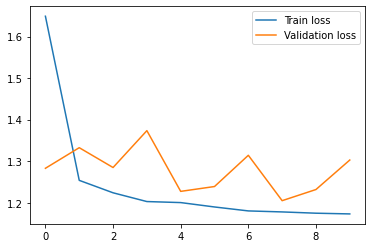

In [39]:
plt.plot(cnn_history.history['loss'], label='Train loss')
plt.plot(cnn_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')


In [40]:
pred= model_cnn.predict(X_valid_series)

In [41]:
val =pd.DataFrame(y_val)
val["pred"]=pred

In [49]:
val

,bikes,pred
datetime,,
2016-05-10 09:30:00,19.593750,20.482416
2016-05-10 10:00:00,20.328125,20.084267
2016-05-10 10:30:00,19.000000,20.823971
2016-05-10 11:00:00,19.328125,19.503311
2016-05-10 11:30:00,19.671875,19.827436
...,...,...
2016-10-05 01:30:00,3.000000,0.847206
2016-10-05 02:00:00,2.000000,0.840594
2016-10-05 02:30:00,2.000000,0.717860


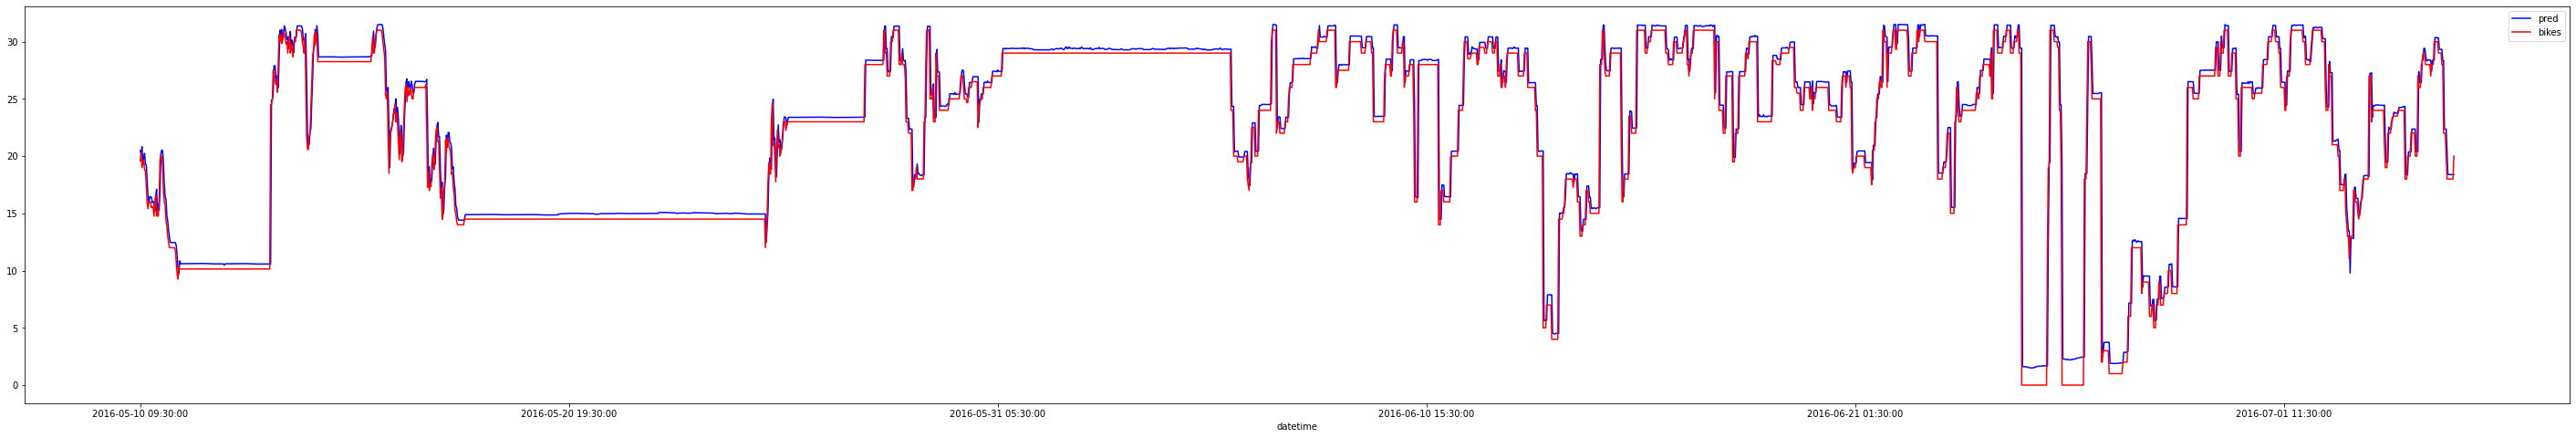

In [42]:
ax = val['pred'][:2699].plot(figsize=(50,8), legend=True, color='blue')
val['bikes'][:2699].plot(legend=True, color='red', figsize=(50,8))

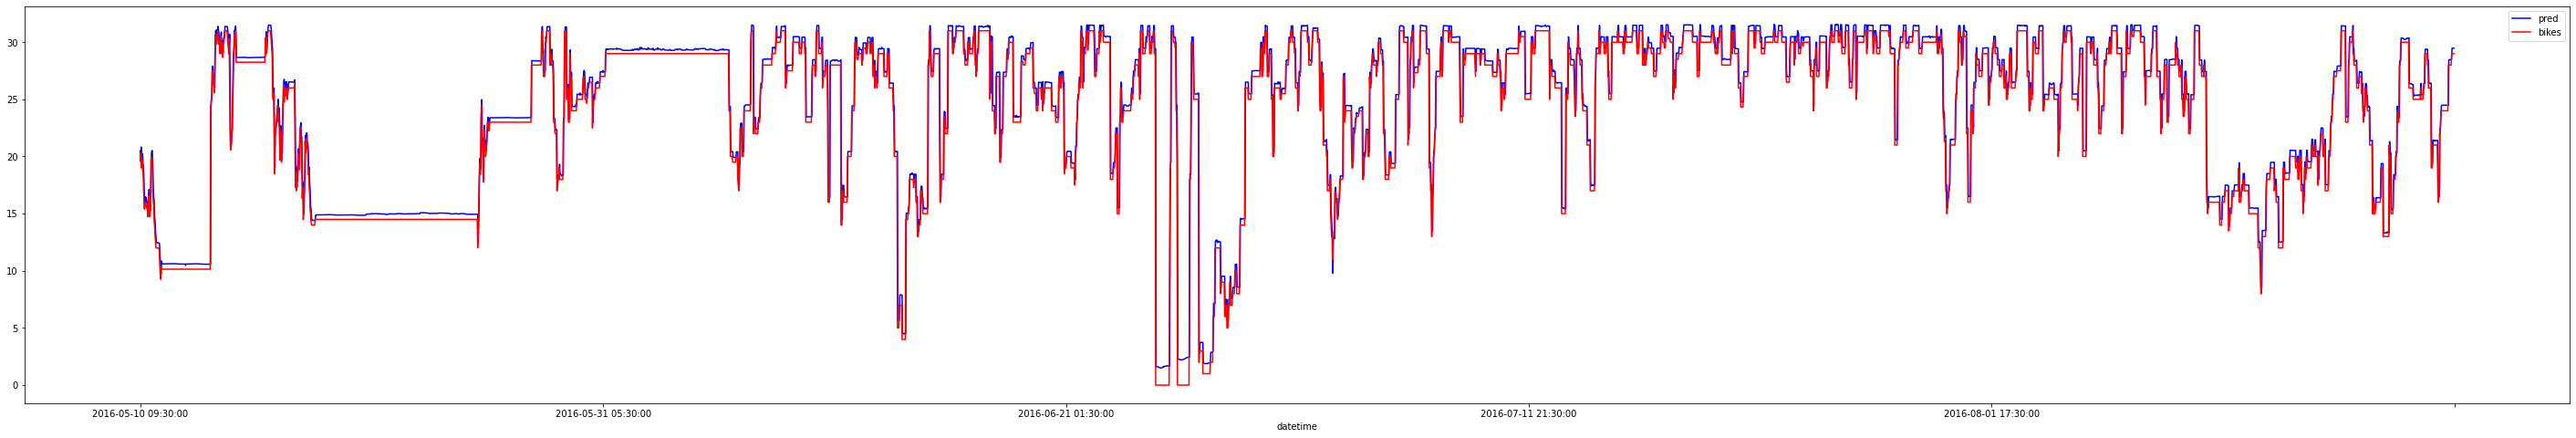

In [43]:
ax = val['pred'][:5000].plot(figsize=(50,8), legend=True, color='blue')
val['bikes'][:5000].plot(legend=True, color='red', figsize=(50,8))

In [48]:
MAPE=mean_absolute_percentage_error(np.array(val['bikes'][:5000]) , np.array( val['pred'][:5000]))
print('MAPE error est :',MAPE)

error=meanabs(val['pred'][:5000], val['bikes'][:5000])
print('MAE error est :',error)

MAPE error est : 1.9121453166007996
MAE error est : 0.8105079
